# Data Visualization and Attribute Relationships


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
bank = pd.read_csv ('bank-data.csv')
bank.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
2,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
3,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
4,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
5,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
6,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
7,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
8,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
9,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


In [65]:
print (bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 21 columns):
age               4120 non-null int64
job               4120 non-null object
marital           4120 non-null object
education         4120 non-null object
default           4120 non-null object
housing           4120 non-null object
loan              4120 non-null object
contact           4120 non-null object
month             4120 non-null object
day_of_week       4120 non-null object
duration          4120 non-null int64
campaign          4120 non-null int64
pdays             4120 non-null int64
previous          4120 non-null int64
poutcome          4120 non-null object
emp.var.rate      4120 non-null float64
cons.price.idx    4120 non-null float64
cons.conf.idx     4120 non-null float64
euribor3m         4120 non-null float64
nr.employed       4120 non-null float64
y                 4120 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 676.0+ KB
None


In [66]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000
mean,40.111165,256.843932,2.537136,960.431553,0.190291,0.084515,93.579538,-40.500485,3.620795,5166.465340
std,10.313313,254.698070,2.567861,191.900428,0.541731,1.563201,0.579377,4.594878,1.733754,73.666441
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [67]:
bank2=bank.drop_duplicates()#remove ulivcates

In [68]:
bank2.head()#view records
bank2.info()#check datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4119 entries, 0 to 4119
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 708.0+ KB


In [24]:
bank2.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4115,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4116,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4117,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4118,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4119,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [69]:
#change column names
bank3=bank2.rename(columns={
                           'emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx','nr.emplyed':'num_emp_qtr','y':'target'})

In [70]:
bank3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4119 entries, 0 to 4119
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp_var_rate      4119 non-null float64
cons_price_idx    4119 non-null float64
cons_conf_idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
target            4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 708.0+ KB


In [72]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)

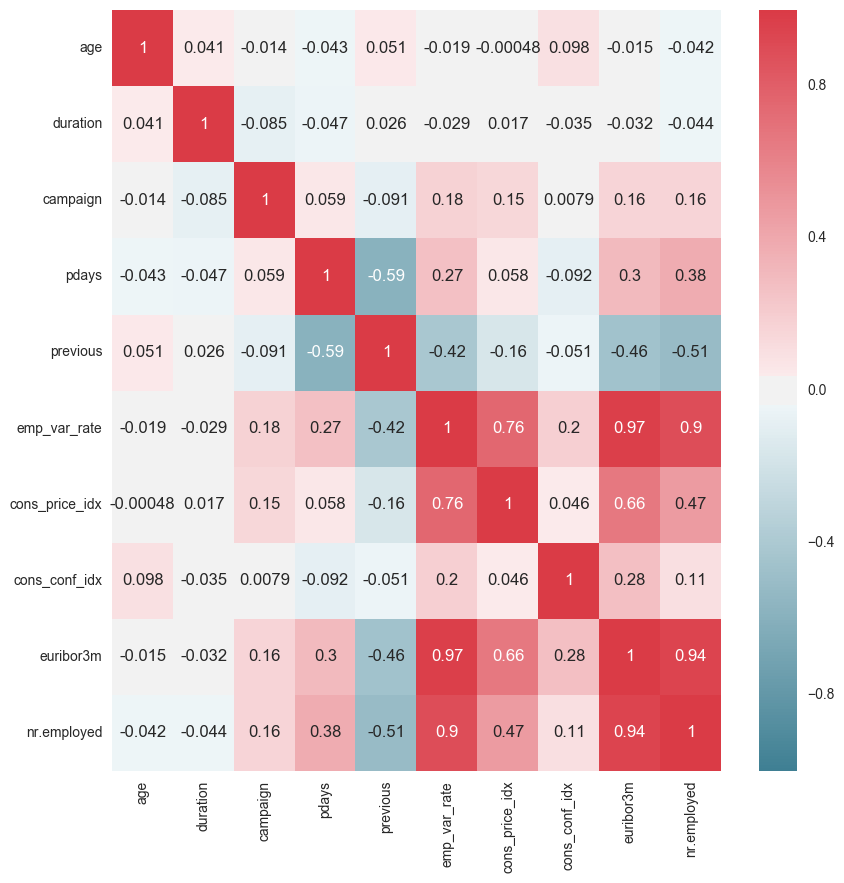

In [74]:
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(bank3.corr(), cmap=cmap, annot=True)

f.tight_layout()

### Heat map illustrates the correlated relationships between continuous variables.  Scatter Plot of the  independent variables give strong evidence of significant positive and inverse relationship of the indicators use to predict that response variable target. 

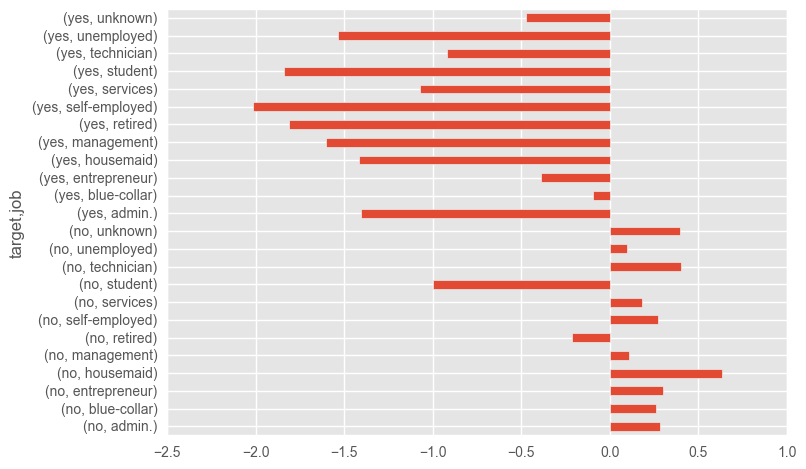

In [87]:

df_grouped = bank3.groupby(by=['target','job'])
survival_rate = df_grouped.emp_var_rate.mean()
ax = survival_rate.plot(kind='barh')

### The Employment Variations were higher for those who were not subscribe to term deposits with exception of Students and Retired.
### The Employment Variations were lower for those who were subscribe to term deposits with the exception of Self Employed leading the job category.

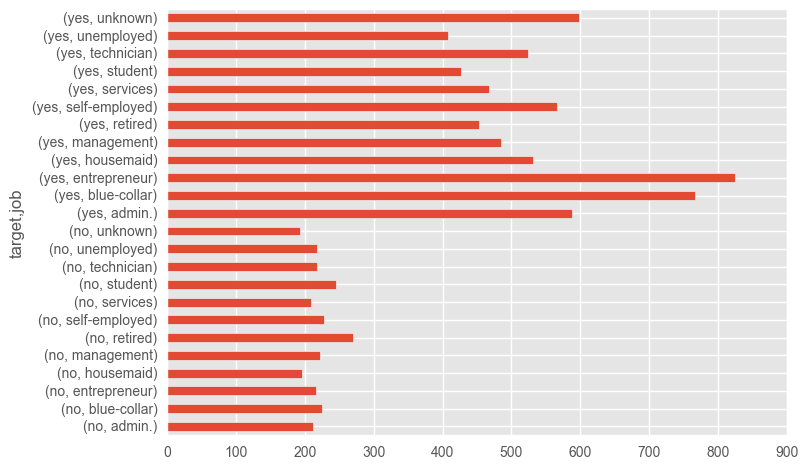

In [86]:
df_grouped = bank3.groupby(by=['target','job'])
survival_rate = df_grouped.duration.mean()
ax = survival_rate.plot(kind='barh')

### Entrepreneurs and Blue Collar workers who had term deposits had averaged longer contact duration with the client  whereas unemployed were spent the least time 
### Reitrees and Students who had no term deposits spent longer times with the client where the housemaid spent the least

In [58]:
print (bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 21 columns):
age               4120 non-null int64
job               4120 non-null object
marital           4120 non-null object
education         4120 non-null object
default           4120 non-null object
housing           4120 non-null object
loan              4120 non-null object
contact           4120 non-null object
month             4120 non-null object
day_of_week       4120 non-null object
duration          4120 non-null int64
campaign          4120 non-null int64
pdays             4120 non-null int64
previous          4120 non-null int64
poutcome          4120 non-null object
emp.var.rate      4120 non-null float64
cons.price.idx    4120 non-null float64
cons.conf.idx     4120 non-null float64
euribor3m         4120 non-null float64
nr.employed       4120 non-null float64
y                 4120 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 676.0+ KB
None
